Лабораторная Работа 2
Нейросети

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet_v2 import ResNet152V2
from keras import *
import random
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


In [2]:
#load data and divide on train and test
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_def, y_train_def), (x_test_def, y_test_def) = fashion_mnist
(x_train, y_train), (x_test, y_test) = (x_train_def.copy(), y_train_def.copy()), (x_test_def.copy(), y_test_def.copy())

4431872/4422102 [==============================] - 0s 0us/step


Провизуализируем данные и параметры

In [3]:
labels = {
    0: "tshirt",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "sirt",
    7: "sneakers",
    8: "bag",
    9: "ankle boot"
}

Количество сэмплов в train/test выборке: 60000/10000 размерность: 28x28 


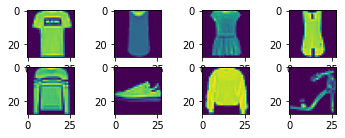

Метки: {0: 'tshirt', 1: 'trouser', 2: 'pullover', 3: 'dress', 4: 'coat', 5: 'sandal', 6: 'sirt', 7: 'sneakers', 8: 'bag', 9: 'ankle boot'} 

Распределение классов в тренировочной выборке
Класс 0 : 6000 сэмплов
Класс 1 : 6000 сэмплов
Класс 2 : 6000 сэмплов
Класс 3 : 6000 сэмплов
Класс 4 : 6000 сэмплов
Класс 5 : 6000 сэмплов
Класс 6 : 6000 сэмплов
Класс 7 : 6000 сэмплов
Класс 8 : 6000 сэмплов
Класс 9 : 6000 сэмплов


In [4]:
print(f"Количество сэмплов в train/test выборке: {x_train.shape[0]}/{x_test.shape[0]} размерность: {x_train.shape[1]}x{x_train.shape[2]} ")

#show samples 
for i in range(1,9):
  img_plt = x_train[i].reshape(28, 28)
  plt.subplot(440+int(i))
  plt.imshow(img_plt)
plt.show()

#define labels meaning
labels = {
    0: "tshirt",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "sirt",
    7: "sneakers",
    8: "bag",
    9: "ankle boot"
}
print(f"Метки: {labels} \n")


unique, counts = np.unique(y_train, return_counts=True)
print("Распределение классов в тренировочной выборке")
for item in np.asarray((unique, counts)).T:
  print(f"Класс {item[0]} : {item[1]} сэмплов")

Предобработка данных

In [5]:
def prepare_dataset(test_shape, train_shape):
  global x_train, y_train, x_test, y_test
  (x_train, y_train), (x_test, y_test) = (x_train_def.copy(), y_train_def.copy()), (x_test_def.copy(), y_test_def.copy())
  x_train, x_test = x_train / 255, x_test / 255
  x_train = x_train.reshape(test_shape)
  x_test = x_test.reshape(train_shape)
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

Некоторые вспомогательные функции

In [6]:
def get_labels(arr):
  return [np.argmax(arr[i]) for i in range(len(arr))]

Построим модель нейросети - обычного перцептрона, как базиса для оптимизации моделей

In [7]:
model = Sequential()
model.add(Dense(50, input_dim=784, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
  optimizer='adam', metrics=['accuracy'])

In [8]:
prepare_dataset((60000, 784), (10000, 784))
model.fit(x_train, y_train, batch_size=32, epochs=10)
classes = model.predict(x_test, batch_size=128)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5320 - accuracy: 0.8155
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3977 - accuracy: 0.8595
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3614 - accuracy: 0.8699
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3399 - accuracy: 0.8777
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3229 - accuracy: 0.8816
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3105 - accuracy: 0.8867
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2992 - accuracy: 0.8899
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.8931
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2819 - accuracy: 0.8961
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.274

In [9]:
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3579 - accuracy: 0.8701
Точность по метрике accuracy : 87.01% Значение функции ошибки 0.3579048216342926


In [10]:
test_classes = get_labels(y_test)
pred_classes  = get_labels(classes)
print(classification_report(test_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.71      0.86      0.78      1000
           3       0.91      0.84      0.87      1000
           4       0.81      0.72      0.76      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.61      0.66      1000
           7       0.95      0.92      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Итак, в случае обычного перцептрона в один скрытый слой мы получили точность по метрике accuracy 86.69% . Перейдем к сверточной нейросети.

**Сверточная нейросеть**

Для начала используем свертку с схемой из двух сверточных слоев и скрытым слоем на 100 нейронов:

---



In [11]:
model = Sequential()
model.add(Conv2D(6, kernel_size=3, activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(36, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        1980      
                                                                 
 flatten (Flatten)           (None, 4356)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               435700    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

Для обучения поделим тренировочный датасет в пропорции 20\80, чтобы выявить переобучение и контролировать качество модели. батч возьмем размером в 32 сэмпла.

In [12]:
prepare_dataset((60000, 28, 28, 1), (10000, 28, 28, 1))
history = model.fit(x_train, y_train, validation_split=0.20,batch_size=32, epochs=20, verbose=0)
classes = model.predict(x_test, batch_size=128)
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")
pred_classes  = get_labels(classes)
print(classification_report(test_classes, pred_classes))

313/313 [==============================] - 2s 5ms/step - loss: 0.5230 - accuracy: 0.9076
Точность по метрике accuracy : 90.75% Значение функции ошибки 0.5229507088661194
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.89      0.86      1000
           3       0.92      0.90      0.91      1000
           4       0.83      0.88      0.85      1000
           5       0.99      0.96      0.97      1000
           6       0.76      0.72      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.96      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Получаем сверткой значение  accuracy 90% на валидационном датасете и 96% на 10 эпохе на обучающем. Продолжаем тюнить нашу модель. Создадим функцию, которая бы строила график значения метрики от количества эпох. 

In [13]:
def plot_loss(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(25,10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Точность на обучении')
  plt.plot(epochs_range, val_acc, label='Точность на валидации')
  plt.legend(loc='lower right')
  plt.title('Точность на обучающих и валидационных данных')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Потери на обучении')
  plt.plot(epochs_range, val_loss, label='Потери на валидации')
  plt.legend(loc='upper right')
  plt.title('Потери на обучающих и валидационных данных')
  plt.show()

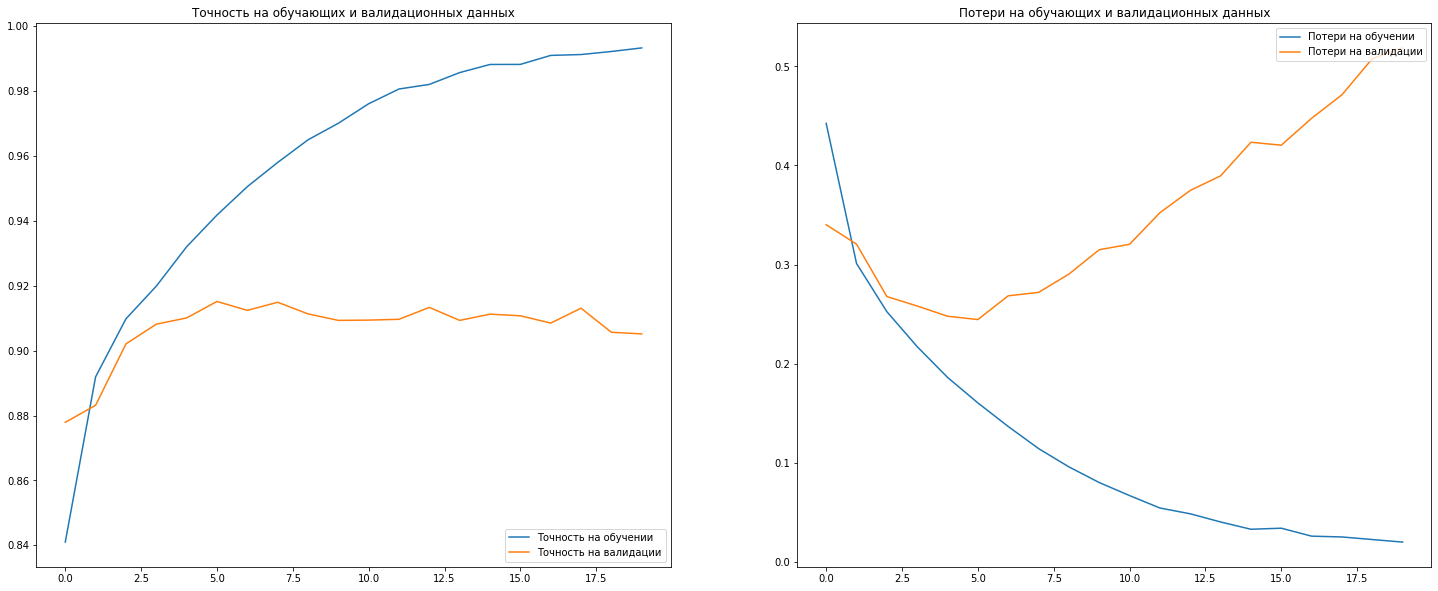

In [14]:
plot_loss(history, 20)

на графике мы видим, что при увеличении количества эпох модель переобучается - попытаемся это исправить. Добавим Batch Normaliation , который приводит батч к нормальному распределению и за счет этого защищает от переобучения.

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(36, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, input_dim=16, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
prepare_dataset((60000, 28, 28, 1), (10000, 28, 28, 1))
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=20)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 6)        24        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 36)        1980      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 36)       144       
 hNormalization)                                                 
                                                      

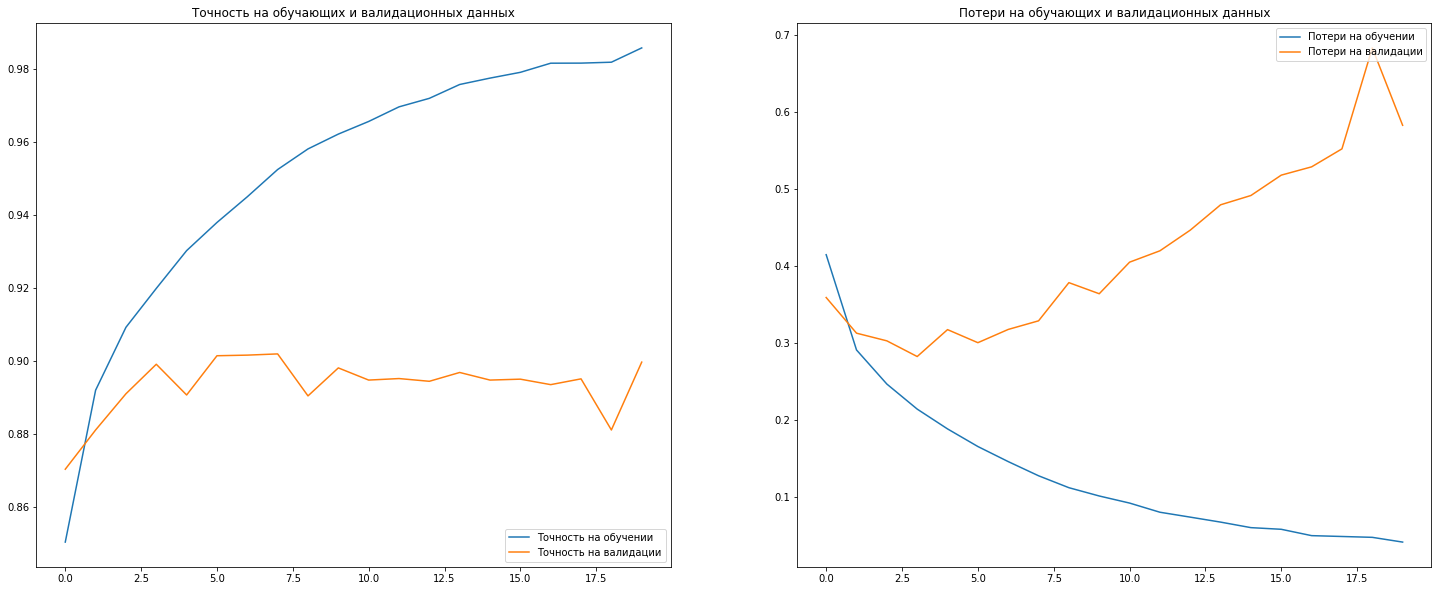

313/313 [==============================] - 2s 5ms/step - loss: 0.6331 - accuracy: 0.8953
Точность по метрике accuracy : 89.52% Значение функции ошибки 0.633078396320343
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.85      0.82      0.84      1000
           3       0.93      0.88      0.90      1000
           4       0.80      0.90      0.85      1000
           5       0.96      0.98      0.97      1000
           6       0.74      0.67      0.70      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [16]:
plot_loss(history, 20)
classes = model.predict(x_test)
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")
pred_classes  = get_labels(classes)
print(classification_report(test_classes, pred_classes))

Слабый результат - Batch Normalization ухудшает результат. 

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),   
    tf.keras.layers.Conv2D(20, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(20, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, input_dim=16, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
prepare_dataset((60000, 28, 28, 1), (10000, 28, 28, 1))
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=20)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 12)        120       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 20)        2180      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 20)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 20)        3620      
                                                                 
 dropout (Dropout)           (None, 11, 11, 20)        0         
                                                                 
 flatten_2 (Flatten)         (None, 2420)              0         
                                                      

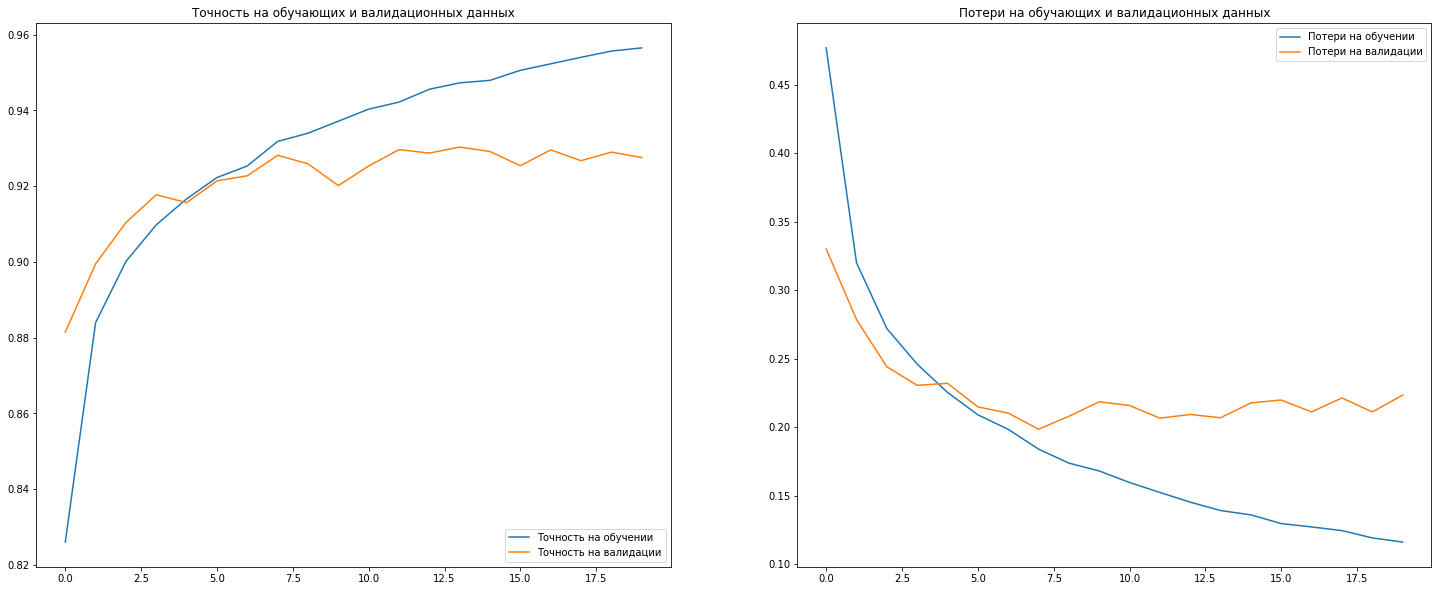

313/313 [==============================] - 2s 5ms/step - loss: 0.2446 - accuracy: 0.9206
Точность по метрике accuracy : 92.05% Значение функции ошибки 0.24460449814796448


In [18]:
plot_loss(history, 20)
classes = model.predict(x_test)
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")
pred_classes  = get_labels(classes)
report = classification_report(test_classes, pred_classes)

Вывод: в итоге мы получили модель с точнотсью распознавания по метрике accuracy 92%. Ниже пример работы модели. 

Expected: ankle boot.   Actual: ankle boot


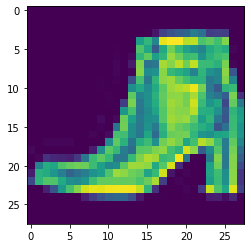

In [19]:
test_image_i = random.randint(0,1000)
image = x_test[test_image_i]
label = y_test[test_image_i]
plt.imshow(image.reshape((28,28)))
predicted_label = np.argmax(model.predict(np.array([image]))[0])
print(f"Expected: {labels[np.argmax(label)]}.   Actual: {labels[predicted_label]}")

Теперь можем заметить из отчета по классификации, что у классов 1, 5, 7, 8 и 9 высокие показатели обучаемости. Напротив, классы 0, 2, 3, 4, 6 дают низкий показатель. Для наглядности проанализируем изображения данных классов

In [20]:
bad_classes = []
good_classes = []
report_splitted = report.split('\n')[2:12]
for item in range(0, len(report_splitted)):
  report_splitted[item] = report_splitted[item].replace('     ','')[4:].split(' ')[2]
  if float(report_splitted[item])<0.95:
    bad_classes.append(str(item)+ ' ' + report_splitted[item])
  else:
    good_classes.append(str(item)+ ' ' + report_splitted[item])


tshirt
pullover
dress
coat
sirt


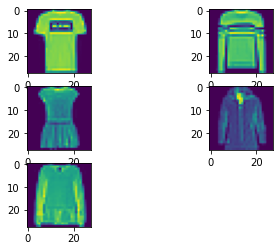

In [21]:
pln = 1
for t in bad_classes:
  print(labels[int(t[0])])
  for i in range(len(x_train)):
    if(np.argmax(y_train[i]) == int(t[0])):
      img_plt = x_train[i].reshape(28, 28)
      plt.subplot(320+pln)
      plt.imshow(img_plt)
      pln += 1
      break
plt.show()

Получаем, что классы с низким показателем качетсва распознавания (меньше 95%) - это представители верхней одежды. Это предсказуемо, так как у таких клаасов меньше различающихся фич и для их распознавания требуются более глубокии модели. 

trouser
sandal
sneakers
bag
ankle boot


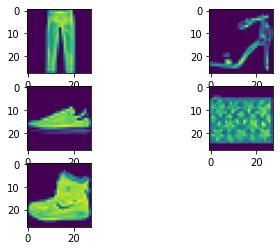

In [22]:
pln = 1
for t in good_classes:
  print(labels[int(t[0])])
  for i in range(len(x_train)):
    if(np.argmax(y_train[i]) == int(t[0])):
      img_plt = x_train[i].reshape(28, 28)
      plt.subplot(320+pln)
      plt.imshow(img_plt)
      pln += 1
      break
plt.show()

Здесь классы более различимы, поэтому и качество высокое. Обьединим выводы в графике для наглядности :

Text(0.5, 0, "['tshirt', 'pullover', 'dress', 'coat', 'sirt', 'trouser', 'sandal', 'sneakers', 'bag', 'ankle boot']")

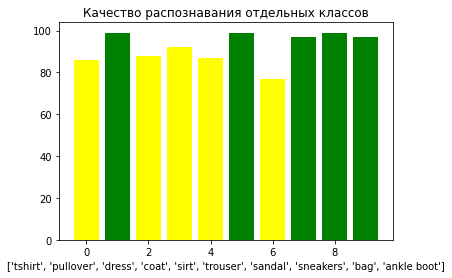

In [23]:
classes = [*[int(i[0]) for i in bad_classes] , *[int(i[0]) for i in good_classes]]
results = [*[float(i[2:])*100 for i in bad_classes] , *[float(i[2:])*100 for i in good_classes]]
plt.bar(classes, results, color=[*['yellow' for i in bad_classes] , *['green' for i in good_classes]])
plt.title("Качество распознавания отдельных классов")
plt.xlabel([labels[t] for t in classes])


**ResNet**

Попробуем использовать усложненную версию сверточной нейросети - ResNet (152V2). Она основывается на принципе "остаточных" слоев, и имеет структуру типа:

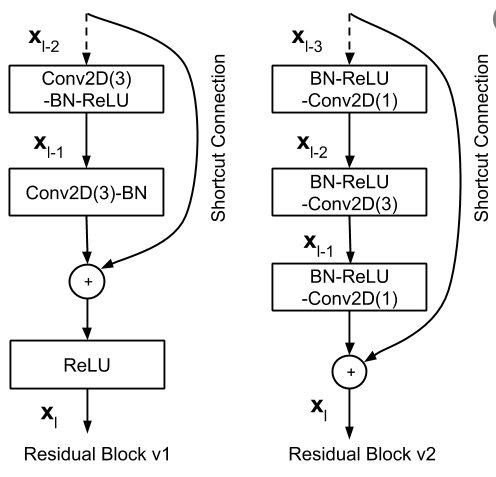

 Таким образом исчезает проблема затухающего градиента и повышается обучаемость начальных слоев сети. Сеть состоит из 152 слоев свертки и  имеет более 5млн обучаемых параметров. В выход модели подсоединим GlobalAveragePooling c Dropout-ом слой и выход на 10 нейронов с активацией softmax.
 Подготовим наш датасет к обучению. Для этого переведем изображения в 3-канальные и расширим до 32х32 формата, как того требует модель ResNet.

Проверка датасета: на картинке должно показываться:ankle boot


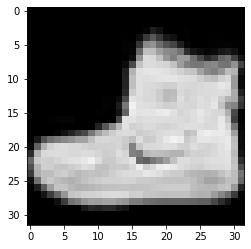

In [24]:
prepare_dataset((60000, 28, 28), (10000, 28, 28))
def transform_to_RGB(images):
  result = []
  for i in range(images.shape[0]):
    img = images[i]
    img2 = np.zeros( ( np.array(img).shape[0], np.array(img).shape[1], 3 ) )
    img2[:,:,0] = img 
    img2[:,:,1] = img
    img2[:,:,2] = img
    result.append(img2)
  return np.array(result)

def rescale(images, shape=(32,32)):
  x_modified = []
  for i in range(images.shape[0]):  
    x_modified.append(resize(images[i], (32, 32)))
  return  np.array(x_modified)

x_test = transform_to_RGB(x_test)
x_train = transform_to_RGB(x_train)
x_test = rescale(x_test)
x_train = rescale(x_train)
plt.imshow(x_train[0])
print(f"Проверка датасета: на картинке должно показываться:{labels[np.argmax(y_train[0])]}")

In [25]:
resnet_model = ResNet152V2(include_top=False, input_shape=(32,32,3))
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(10, activation= 'softmax')(x)
model = Model(inputs = resnet_model.input, outputs = predictions)
#resnet_model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


234561536/234545216 [==============================] - 5s 0us/step


Epoch 1/20
540/540 [==============================] - 213s 356ms/step - loss: 0.1106 - accuracy: 0.8065 - val_loss: 0.0621 - val_accuracy: 0.8807
Epoch 2/20
540/540 [==============================] - 189s 351ms/step - loss: 0.0530 - accuracy: 0.8987 - val_loss: 0.0462 - val_accuracy: 0.9077
Epoch 3/20
540/540 [==============================] - 189s 351ms/step - loss: 0.0460 - accuracy: 0.9115 - val_loss: 0.0971 - val_accuracy: 0.8165
Epoch 4/20
540/540 [==============================] - 189s 351ms/step - loss: 0.0418 - accuracy: 0.9184 - val_loss: 0.0475 - val_accuracy: 0.9090
Epoch 5/20
540/540 [==============================] - 189s 351ms/step - loss: 0.0385 - accuracy: 0.9241 - val_loss: 0.0474 - val_accuracy: 0.9112
Epoch 6/20
540/540 [==============================] - 189s 350ms/step - loss: 0.0365 - accuracy: 0.9297 - val_loss: 0.0449 - val_accuracy: 0.9123
Epoch 7/20
540/540 [==============================] - 190s 351ms/step - loss: 0.0362 - accuracy: 0.9298 - val_loss: 0.0622 -

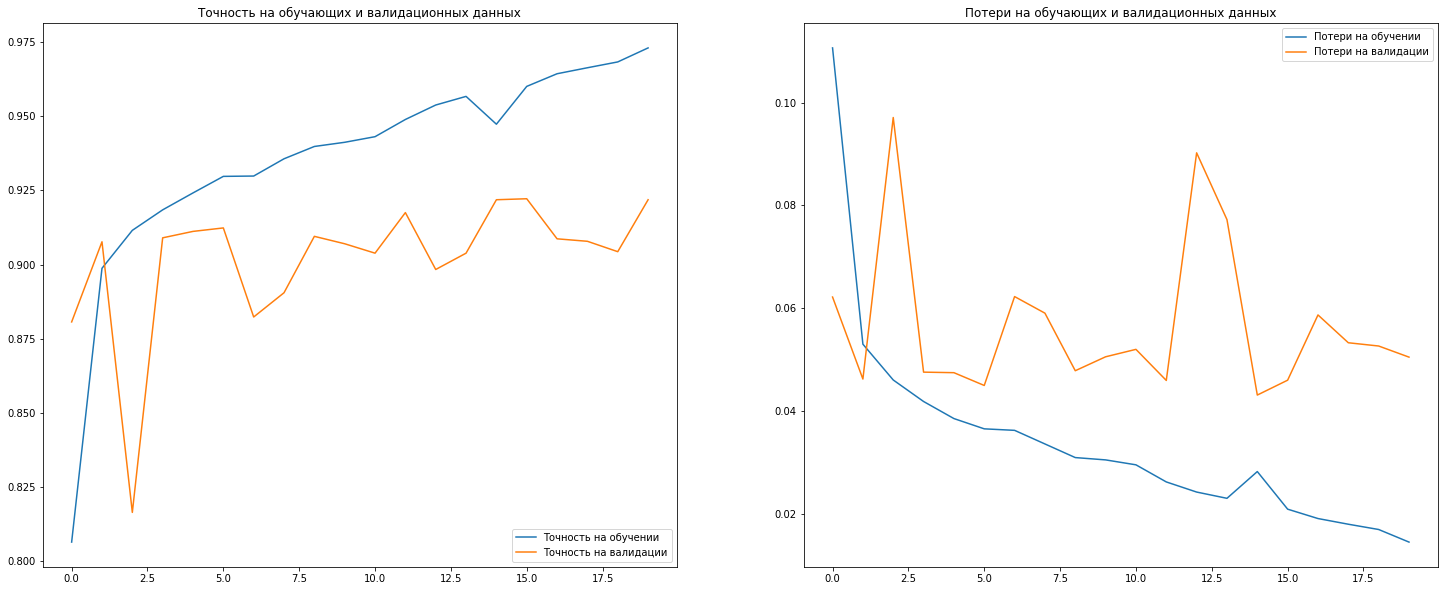

313/313 [==============================] - 26s 73ms/step - loss: 0.0570 - accuracy: 0.9159
Точность по метрике accuracy : 91.58% Значение функции ошибки 0.05701904371380806


In [26]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.1)
plot_loss(history, 20)
classes = model.predict(x_test)
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")
pred_classes  = get_labels(classes)
report = classification_report(test_classes, pred_classes)

Результат - 91.58% по метрике accuracy. Итого с помощью модели из трех сверточных слоев и одного скрытого слоя получаем метрику 93% , а с помощью модели ResNet - 91.58%. 